In [2]:
import flopy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
path = 'choshui_original.bas'
i=0
bound = []
b = []

with open(path) as f:
    for line in f.readlines():
        if i>=2:
            break
        elif 'Layer' in line:
            i+=1
        elif i==1:
            s = line.split(' ')
            
            for j in s:
                if j != '' :
                    b.append(int(j)) 
                    
            if len(b) >= 309:
                
                bound.append(b)
                b=[]
           
            
print(len(bound[0]))

309


c:\users\hulab\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
bound = bound[::-1]
bound = np.array(bound)
print(bound.shape)

(400, 309)


c:\users\hulab\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
wel_path = "C:/Users/hulab/Desktop/Choushi_2020_地下水模式/choshui.wel"
i = 0
wel = []
rech = []

with open(wel_path) as f:
    for line in f.readlines():
        if i>=2:
            break
        elif 'Period' in line:
            i+=1
        elif i==1:
            line = line.replace('-',' -')
            s = line.split(' ')
            s = [float(x) for x in s if x != '']
            
            if s[3]>0:
                rech.append(s)
            elif s[3]<0:
                wel.append(s)
            
            if s[0]>1:
                i += 1
                           
for i in wel:
    r = -int(i[1])+400-1
    c = int(i[2])
    bound[r][c] = 2
    
for i in rech:
    r = -int(i[1])+400-1
    c = int(i[2])
    bound[r][c] = 3

c:\users\hulab\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\hulab\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


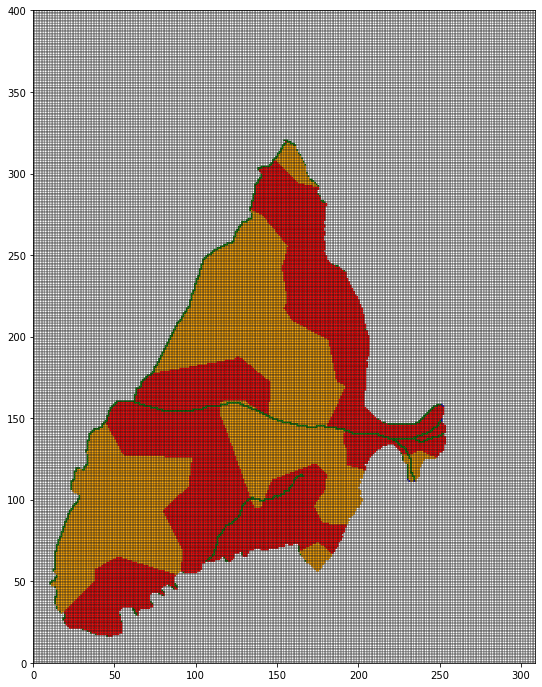

In [7]:
cmap = colors.ListedColormap(['blue','white','green','red','orange'])

plt.figure(figsize=(9,12))
plt.pcolor(bound, cmap=cmap, edgecolors='black')
plt.show()